In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import yfinance as yf

In [3]:
# Get the data
tlt = yf.download("TLT", start="2002-01-01", end="2022-06-30")
# Prepare the data
tlt["log_return"] = np.log(tlt["Adj Close"] / tlt["Adj Close"].shift(1))

# Then we’ll add a column for the calendar day of the month (1 – 31) and a column for the year.

tlt["day_of_month"] = tlt.index.day

tlt["year"] = tlt.index.year

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

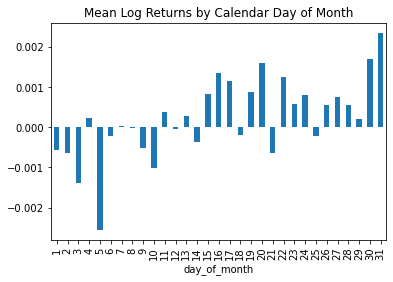

In [4]:
# Investigate Our Hypothesis
# We expect there to be positive returns in TLT toward the end of the month. We expect this because we think fund managers buy TLT at the end of the month. We expect there to be negative returns in TLT toward the beginning of the month. This is when fund managers sell their high-quality assets and go back to buying meme stocks.

grouped_by_day = tlt.groupby("day_of_month").log_return.mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

Build A Simple Trading Strategy

Let’s build a naive strategy to test our hypothesis:

- Buy and hold TLT during the last week of the month
- Short and hold TLT during the first week of the month
Simple.

This code creates 3 new columns:

first_week_returns – the daily log return if it’s between the 1st and 7th day of the month, otherwise 0
last_week_returns – the daily log return if it’s on or after the 23rd day of the month, otherwise 0
last_week_less_first_week – the difference between last_week_returns and first_week_returns
last_week_less_first_week represents the returns from our naive strategy. It’s basically saying “go long TLT the last week” and “go short TLT the first week”.

In [5]:
# Build A Simple Trading Strategy
tlt["first_week_returns"] = 0.0
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[
    tlt.day_of_month <= 7
].log_return

tlt["last_week_returns"] = 0.0
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[
    tlt.day_of_month >= 23
].log_return

tlt["last_week_less_first_week"] = tlt.last_week_returns - tlt.first_week_returns
tlt

,Open,High,Low,Close,Adj Close,Volume,log_return,day_of_month,year,first_week_returns,last_week_returns,last_week_less_first_week
Date,,,,,,,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,40.925755,6100,NaN,30,2002,0.000000,NaN,NaN
2002-07-31,81.949997,82.800003,81.900002,82.529999,41.432789,29400,0.012313,31,2002,0.000000,0.012313,0.012313
2002-08-01,82.540001,83.019997,82.540001,83.000000,41.668766,25000,0.005679,1,2002,0.005679,0.000000,-0.005679
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.095444,52800,0.010188,2,2002,0.010188,0.000000,-0.010188
2002-08-05,84.040001,84.440002,83.849998,84.220001,42.281208,61100,0.004403,5,2002,0.004403,0.000000,-0.004403
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,113.900002,115.169998,113.489998,114.139999,111.533073,20669200,0.008181,23,2022,0.000000,0.008181,0.008181
2022-06-24,113.459999,114.169998,112.500000,112.559998,109.989143,18161300,-0.013940,24,2022,0.000000,-0.013940,-0.013940
2022-06-27,111.220001,112.220001,111.160004,111.599998,109.051071,12053000,-0.008565,27,2022,0.000000,-0.008565,-0.008565


<AxesSubplot:title={'center':'Mean Log Strategy Returns by Year'}, xlabel='year'>

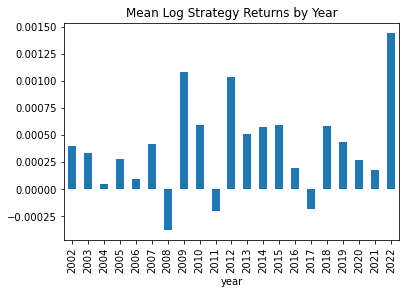

In [6]:
# Plot the return
(
    tlt.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
)

<AxesSubplot:title={'center':'Cumulative Sum of Returns By Year'}, xlabel='year'>

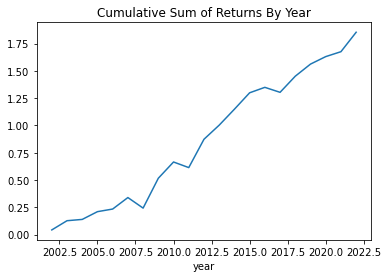

In [7]:
# Cumulative returns by years
(
    tlt.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
)

<AxesSubplot:title={'center':'Cumulative Sum of Returns By Day'}, xlabel='Date'>

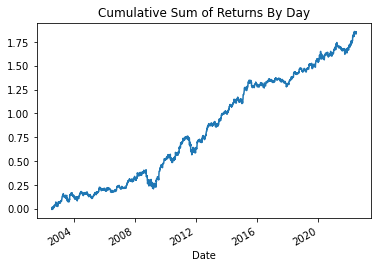

In [8]:
# Cumulative returns by day
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")

<AxesSubplot:title={'center':'Cumulative Returns By Day'}, xlabel='Date'>

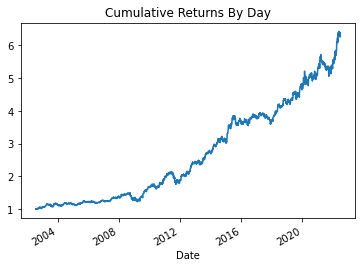

In [9]:
# Cumulative returns by day
np.exp(tlt.last_week_less_first_week.cumsum()).plot(
    title="Cumulative Returns By Day"
)

In [11]:
# Compute sharpe ratio for the log return
tlt.last_week_less_first_week.mean() / tlt.last_week_less_first_week.std()
# Compute sharpe ratio for the return
np.exp(tlt.last_week_less_first_week.mean()) / np.exp(
    tlt.last_week_less_first_week.std()
)

0.9941634176900581